In [61]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler 

## Data Preparation

In [2]:
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Random Distribution

In [3]:
# random variates: 確率変量
stats.randint(1, 7).rvs()

3

In [4]:
stats.uniform(0, 1).rvs()

0.5442203351571927

## Visualization of PMF and PDF

In [5]:
def simple_func(x):
    y = x**2 + 3
    return y

In [6]:
simple_func(10)

103

In [7]:
# x = np.linspace(-3, 3, 100)
x = np.arange(-3, 4)
y = simple_func(x)

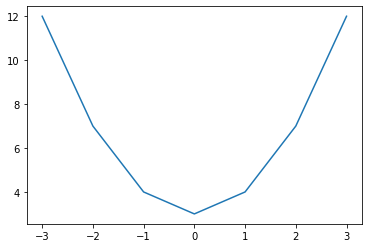

In [8]:
plt.plot(x, y)

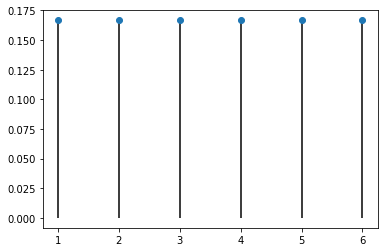

In [9]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

In [10]:
x = np.linspace(-2, 2, 100)
# y = stats.uniform(loc=-1, scale=2).pdf(x)
y = stats.uniform(0, 1).pdf(x)

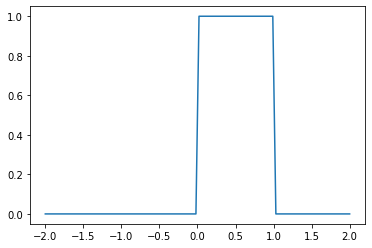

In [11]:
plt.plot(x, y)

## Cumulative Distribution Function

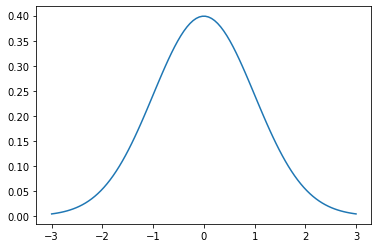

In [12]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

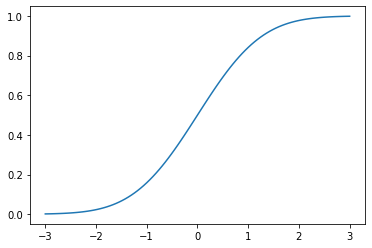

In [13]:
y = stats.norm.cdf(x)
plt.plot(x, y)

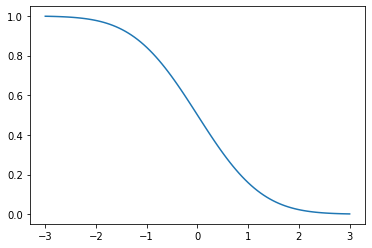

In [14]:
y = stats.norm.sf(x)
plt.plot(x, y)

## Normal Distribution

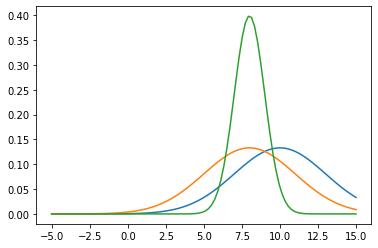

In [15]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

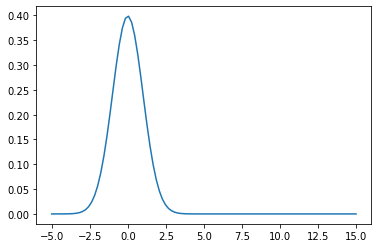

In [16]:
x = np.linspace(-5, 15, 100)
y = stats.norm().pdf(x)
plt.plot(x, y)

## Kernel Density Estimation

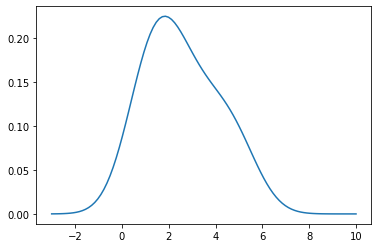

In [17]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)
plt.plot(x, y)

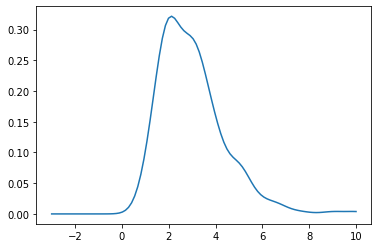

In [18]:
y = stats.gaussian_kde(df["tip"]).pdf(x)
plt.plot(x, y)

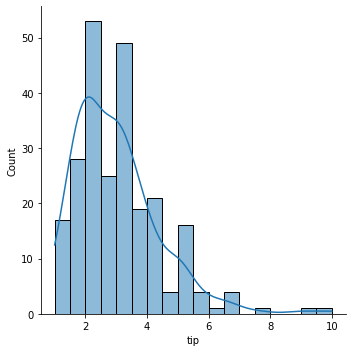

In [19]:
sns.displot(df["tip"], kde=True)

In [55]:
resample_data = stats.gaussian_kde(df["tip"]).resample()
resample_data

array([[2.00115615, 1.61704106, 2.04404446, 5.26820547, 1.72521249,
        1.54482737, 0.94117852, 3.00288318, 1.56019605, 3.81304662,
        3.19652672, 1.78612042, 0.71203959, 4.34762591, 2.87160929,
        3.59057213, 4.61637266, 5.30647608, 2.85945706, 2.74527543,
        4.34770962, 2.92304316, 2.03593351, 2.97899065, 4.79885943,
        4.05044855, 3.61906576, 9.83289175, 2.4599109 , 2.62045605,
        1.88424398, 2.7644461 , 2.38469123, 3.25265071, 2.04233218,
        2.52416565, 4.79986897, 3.83206276, 4.02191916, 4.89967389,
        4.47983105, 1.12565237, 5.80097893, 3.02310611, 2.27777156,
        3.92165927, 3.13201985, 3.62648249, 2.29138676, 4.44980364,
        2.9592247 , 2.61870451, 1.63994458, 1.44237569, 3.29317994,
        3.73855461, 2.43772995, 3.37603734, 2.14253405, 4.94310511,
        4.13217061, 3.16673386, 1.8352023 , 3.08441513, 1.12332124,
        2.56863465, 3.80046252, 3.21657771, 1.70545423, 1.63289717,
        2.17060228, 1.10079901, 1.74212525, 2.37

## 68-95-99.7 Rule

In [58]:
mu = 4
sigma = 3
samples = 10000
x = stats.norm(loc=mu, scale=sigma).rvs(samples)

In [59]:
num = 0
num += sum(x[x>0]<(mu+sigma))
num += sum(x[x<0]>(mu-sigma))
num / samples

0.74868

In [56]:
num = 0
num += sum(x[x>0]<(mu+2*sigma))
num += sum(x[x<0]>(mu-2*sigma))
num / samples

0.9564

In [57]:
num = 0
num += sum(x[x>0]<(mu+3*sigma))
num += sum(x[x<0]>(mu-3*sigma))
num / samples

0.998

In [53]:
mu = 4
sigma = 3
samples = 1000
x = stats.norm(loc=mu, scale=sigma).rvs(samples)

## Standardization

In [62]:
scaler = StandardScaler()

In [72]:
x = df["tip_rate"].values.reshape(-1, 1)
x = df["tip_rate"].values.reshape(-1, 1)
scaled = scaler.fit_transform(x)

In [73]:
x = df[["total_bill", "tip_rate"]]
scaler.fit_transform(x)

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

## Binomial Distribution

In [77]:
n = 3
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)

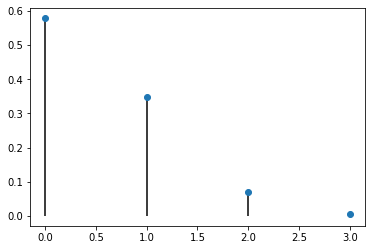

In [81]:
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

## Binomial Diatribution and Normal Distribution

In [119]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)

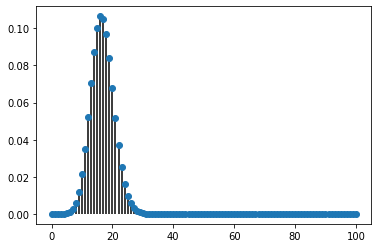

In [120]:
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

In [128]:
n = 100
p = 1/6
x2 = np.linspace(0, n+1, 100)
y2 = stats.norm(loc=n*p, scale=np.sqrt(n*p*(1-p))).pdf(x2)

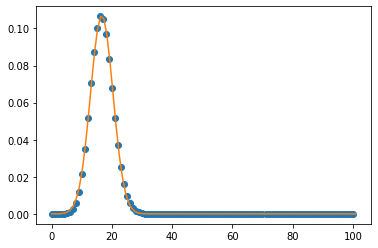

In [129]:
plt.plot(x, y, "o")
plt.plot(x2, y2)